## This script is built on the raw Airline data with out Weather Data. It has AUC of 65%

In [1]:
import sys
import random
import numpy as np

from sklearn import linear_model, cross_validation, metrics, svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Shyam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
col_types = {'DepDelay': int, 'Month': int, 'DayofMonth': int, 'DayOfWeek': int, 'hour': int, 'Distance': int,
             'UniqueCarrier': str, 'Dest': str, 'd2h': int,'isdelay': int}


In [3]:
mdata = pd.read_pickle('dataset.pkl')

In [4]:
data =mdata[['DepDelay', 'Month', 'DayofMonth', 'DayOfWeek', 'hour', 'Distance', 'UniqueCarrier', 'Dest', 'd2h', 'isdelay']]

In [5]:
cols = ['Month', 'DayofMonth', 'DayOfWeek', 'hour', 'Distance', 'd2h']

In [6]:
colsy= ['isdelay']

In [66]:
X = data[cols]
X.shape
type(X)

pandas.core.frame.DataFrame

In [8]:
y=data[colsy]
y.shape


(619968, 1)

In [ ]:
X.

In [9]:
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.70, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(433977, 6)
(433977, 1)
(185991, 6)
(185991, 1)


In [67]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=6)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

print(colnames_selected)


['Month', 'DayofMonth', 'DayOfWeek', 'hour', 'Distance', 'd2h']


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]    
    auc = roc_auc_score(y_test, y_hat)
    #cm=confusion_matrix(list(y_test),list(y_hat))
    return auc

auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)


C:\Users\Shyam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.638700282194


In [23]:
model = LogisticRegression(penalty='l2',class_weight='auto',C=0.1)
model.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test,model.predict(X_test))
print("Logistic classifier ROC = ",  logit_roc_auc)
print(classification_report(y_test,model.predict(X_test)))


C:\Users\Shyam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shyam\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


Logistic classifier ROC =  0.602372873043
             precision    recall  f1-score   support

          0       0.87      0.59      0.71    151826
          1       0.25      0.61      0.36     34165

avg / total       0.76      0.60      0.64    185991



In [16]:
print(model.densify)

<bound method SparseCoefMixin.densify of LogisticRegression(C=0.1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>


In [30]:
random_forest = RandomForestClassifier(n_estimators=50, n_jobs=-1,class_weight='auto',min_samples_leaf=20,oob_score=True)

In [63]:
%%time
random_forest = RandomForestClassifier(n_estimators=50, n_jobs=1,class_weight='auto',min_samples_leaf=20,oob_score=True)
random_forest.fit(X_train,y_train)

random_roc_auc = roc_auc_score(y_test,random_forest.predict(X_test))
print("Random classifier ROC = ",  random_roc_auc)
print(classification_report(y_test,random_forest.predict(X_test)))
print(random_forest.feature_importances_)

Random classifier ROC =  0.643791428852
             precision    recall  f1-score   support

          0       0.88      0.70      0.78    151826
          1       0.31      0.58      0.40     34165

avg / total       0.78      0.68      0.71    185991

[ 0.12777013  0.11542125  0.05152615  0.32769322  0.2777919   0.09979736]
Wall time: 52.3 s


In [64]:
%%time
random_forest = RandomForestClassifier(n_estimators=50, n_jobs=-1,class_weight='auto',min_samples_leaf=20,oob_score=True)
random_forest.fit(X_train,y_train)

random_roc_auc = roc_auc_score(y_test,random_forest.predict(X_test))
print("Random classifier ROC = ",  random_roc_auc)
print(classification_report(y_test,random_forest.predict(X_test)))
print(random_forest.feature_importances_)

Random classifier ROC =  0.64329308866
             precision    recall  f1-score   support

          0       0.88      0.70      0.78    151826
          1       0.31      0.58      0.40     34165

avg / total       0.78      0.68      0.71    185991

[ 0.12690509  0.11665349  0.05154102  0.32811223  0.27518015  0.10160801]
Wall time: 27.7 s


In [18]:

from sklearn import tree

dtree = tree.DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)
dtree_roc_auc = roc_auc_score(y_test,dtree.predict(X_test))
print("Random classifier ROC = ",  dtree_roc_auc)
print(classification_report(y_test,dtree.predict(X_test)))
print(dtree.feature_importances_)
print(confusion_matrix(y_test,dtree.predict(X_test)))


Random classifier ROC =  0.554860477429
             precision    recall  f1-score   support

          0       0.84      0.83      0.83    151826
          1       0.27      0.28      0.28     34165

avg / total       0.73      0.73      0.73    185991

[ 0.04260305  0.07704791  0.04679286  0.15011325  0.61821898  0.06522395]
[[125903  25923]
 [ 24583   9582]]


In [19]:
aa=confusion_matrix(y_test,dtree.predict(X_test))

In [20]:
print(pd.DataFrame(aa))

        0      1
0  125903  25923
1   24583   9582


C:\Users\Shyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


10 trees
C-stat:  0.547803200541



C:\Users\Shyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


30 trees
C-stat:  0.551206716839



C:\Users\Shyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 trees
C-stat:  0.551306414547



C:\Users\Shyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


75 trees
C-stat:  0.551870717064



C:\Users\Shyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100 trees
C-stat:  0.551612092713



C:\Users\Shyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


150 trees
C-stat:  0.551805205663



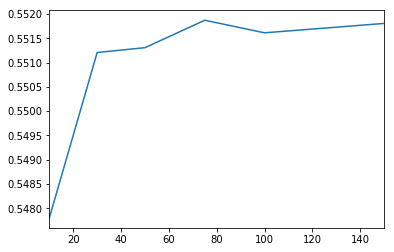

In [40]:
results = []
n_estimator_options = [10, 30, 50, 75, 100, 150]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    print (trees, "trees")
    roc = roc_auc_score(y_test, model.predict(X_test))
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot();

In [41]:
import warnings
warnings.filterwarnings('ignore')

auto options
C-stat:  0.551306414547

None options
C-stat:  0.553932245423

sqrt options
C-stat:  0.551306414547

log2 options
C-stat:  0.551306414547

0.9 options
C-stat:  0.553173612424

0.2 options
C-stat:  0.551133864006



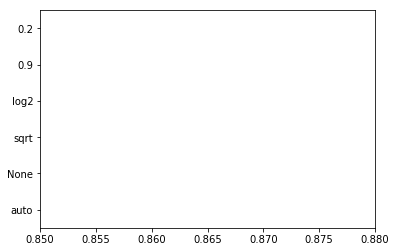

In [47]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    %%timeit
    model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train, y_train)
    print (max_features, "options")
    roc = roc_auc_score(y_test, model.predict(X_test))
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    

pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

50 min_samples
C-stat:  0.649491434125
        0      1
0  101511  50315
1   12628  21537
             precision    recall  f1-score   support

          0       0.89      0.67      0.76    151826
          1       0.30      0.63      0.41     34165

avg / total       0.78      0.66      0.70    185991


75 min_samples
C-stat:  0.650298940632
       0      1
0  99752  52074
1  12177  21988
             precision    recall  f1-score   support

          0       0.89      0.66      0.76    151826
          1       0.30      0.64      0.41     34165

avg / total       0.78      0.65      0.69    185991




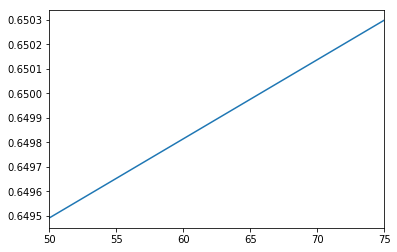

In [65]:
results = []
min_samples_leaf_options = [50, 75]
# min_samples_leaf_options = [10, 20]
for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=42,max_features="auto",oob_score=True,class_weight="auto",min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    print (min_samples, "min_samples")
    roc = roc_auc_score(y_test, model.predict(X_test))
    print ("C-stat: ", roc)
    results.append(roc)
    cm = confusion_matrix(y_test,model.predict(X_test))
    print(pd.DataFrame(cm))
    print(classification_report(y_test,model.predict(X_test)))
    print("")
    
pd.Series(results, min_samples_leaf_options).plot();